In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Import the 3 dimensionality reduction methods
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [3]:
train = pd.read_csv('/Users/chunyu/Downloads/kaggle/digit_recognizer/keras/input/train.csv')
target = train['label']
train = train.drop("label",axis=1)

In [4]:
from sklearn.preprocessing import StandardScaler
X = train.values
X_std = StandardScaler().fit_transform(X)

# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the eigenvalue, eigenvector pair from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp)

/Library/Python/2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



In [9]:
trace1 = go.Scatter(
    x=list(range(784)),
    y= cum_var_exp,
    mode='lines+markers',
    name="'Cumulative Explained Variance'",
    #hoverinfo= cum_var_exp,
    line=dict(
        shape='spline',
        color = ('rgb(205, 12, 24)')
    )
)
trace2 = go.Scatter(
    x=list(range(784)),
    y= var_exp,
    mode='lines+markers',
    name="'Individual Explained Variance'",
    #hoverinfo= var_exp,
    line=dict(
        shape='linear',
        color = ('rgb(22, 96, 167)')
    )
)
fig = tls.make_subplots(insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.5}],
                          print_grid=True)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2,1,1)
fig.layout.title = 'Explained Variance plots - Full and Zoomed-in'
fig.layout.xaxis = dict(range=[0, 80], title = 'Feature columns')
fig.layout.yaxis = dict(range=[0, 60], title = 'Explained Variance')
#fig['data'] += [go.Scatter(x= list(range(784)) , y=cum_var_exp, xaxis='x2', yaxis='y2', name = 'Cumulative Explained Variance')]
#fig['data'] += [go.Scatter(x=list(range(784)), y=var_exp, xaxis='x2', yaxis='y2',name = 'Individual Explained Variance')]

# fig['data'] = data
# fig['layout'] = layout
# fig['data'] += data2
# fig['layout'] += layout2
py.iplot(fig, filename='inset example')

This is the format of your plot grid:
[ (1,1) x1,y1 ]

With insets:
[ x2,y2 ] over [ (1,1) x1,y1 ]



In [10]:
n_components = 30
pca = PCA(n_components=n_components).fit(train.values)

eigenvalues = pca.components_.reshape(n_components, 28, 28)

# Extracting the PCA components ( eignevalues )
#eigenvalues = pca.components_.reshape(n_components, 28, 28)
eigenvalues = pca.components_

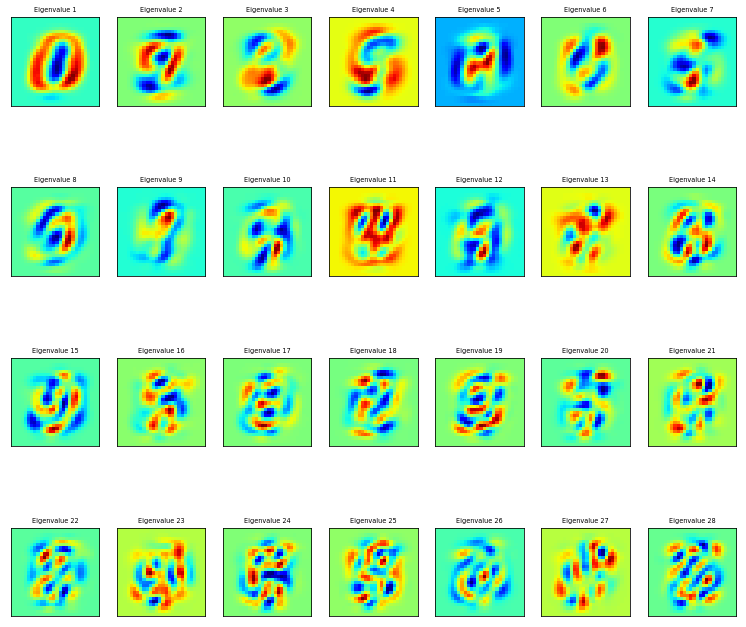

In [11]:
n_row = 4
n_col = 7

# Plot the first 8 eignenvalues
plt.figure(figsize=(13,12))
for i in list(range(n_row * n_col)):
#     for offset in [10, 30,0]:
#     plt.subplot(n_row, n_col, i + 1)
    offset =0
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(eigenvalues[i].reshape(28,28), cmap='jet')
    title_text = 'Eigenvalue ' + str(i + 1)
    plt.title(title_text, size=6.5)
    plt.xticks(())
    plt.yticks(())
plt.show()